In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import statsmodels.api as sm
import scipy.stats as stats
from pylab import *
from scipy.io import loadmat

In [2]:
df=pd.read_csv("Puerto_Morelos.csv", header=int(0))

In [3]:
from datetime import datetime
df['date']= df.apply(lambda x:datetime.strptime("{0} {1} {2} {3}".format(x[u'año'],x[u'mes'], x[u'dia'], x[u'hora(utc)']), "%Y %m %d %H"),axis=1)

In [4]:
df.tail()

,año,mes,dia,hora(utc),altura(mm),date
8779,2016,12,31,19,776,2016-12-31 19:00:00
8780,2016,12,31,20,1048,2016-12-31 20:00:00
8781,2016,12,31,21,1194,2016-12-31 21:00:00
8782,2016,12,31,22,0,2016-12-31 22:00:00
8783,2016,12,31,23,0,2016-12-31 23:00:00


In [5]:
df.dtypes

año                    int64
mes                    int64
dia                    int64
hora(utc)              int64
altura(mm)             int64
date          datetime64[ns]
dtype: object

In [6]:
df=df.drop(['año', 'mes', 'dia', 'hora(utc)'], axis=1)

In [7]:
df.columns

Index(['altura(mm)', 'date'], dtype='object')

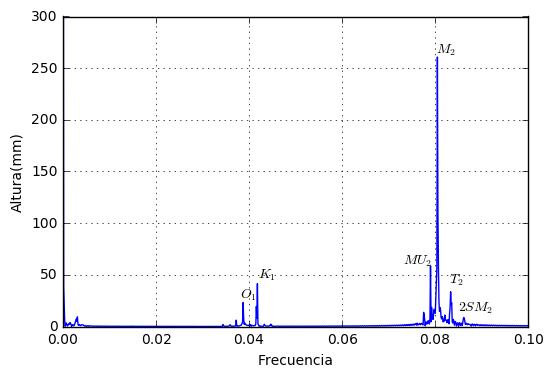

In [40]:
N = 8784
T = 1
x = df['date']
y = df['altura(mm)']
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.xlim(0,0.1)
plt.ylim(0,300)
plt.text(0.0801, 265,'$M_2$')
plt.text(0.083, 42,'$T_2$')
plt.text(0.085, 15,'$2SM_2$')#0.086
plt.text(0.073, 60,'$MU_2$')
plt.text(0.042, 47,'$K_1$')
plt.text(0.038, 27,'$O_1$')
plt.xlabel('Frecuencia')
plt.ylabel('Altura(mm)')
plt.grid()
plt.show()